In [1]:
import pandas as pd
import numpy as np

# To Build model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# To Evaluate model 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, multilabel_confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import plotly.express as px

# To visualize data
import matplotlib.pyplot as plt
import seaborn as sns
     
# To save model & column name in dictionary
import pickle
import json

# To avoid warning
import warnings
warnings.filterwarnings("ignore")

## 1. Problem Statement

## 2. Data Gathering

In [2]:
# To convert .csv file to DataFrame
df = pd.read_csv("Iris.csv")
df

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris-virginica  

[150 rows x 6 columns]

## 3. Exploratory data analysis (EDA)

In [3]:
# To check no of missing value & datatype of features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
# To see value counts & convert into dictionary
df["Species"].value_counts().to_dict()

{'Iris-setosa': 50, 'Iris-versicolor': 50, 'Iris-virginica': 50}

In [5]:
# To check no of missing value in each column/feature/attribute
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Outlier detection through visualisation

<AxesSubplot:xlabel='SepalLengthCm'>

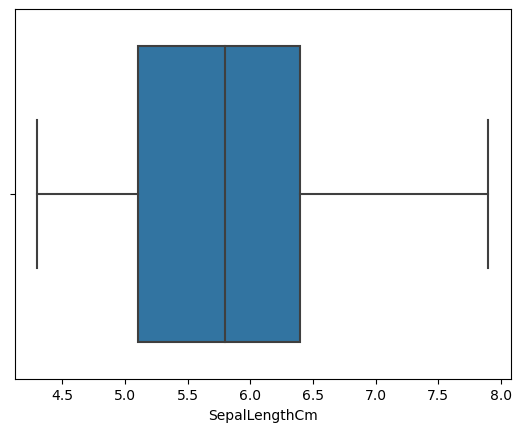

In [6]:
sns.boxplot(df["SepalLengthCm"])

<AxesSubplot:xlabel='SepalWidthCm'>

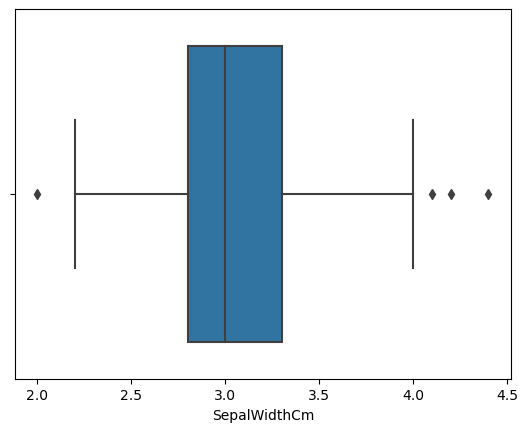

In [7]:
sns.boxplot(df["SepalWidthCm"])

<AxesSubplot:xlabel='PetalLengthCm'>

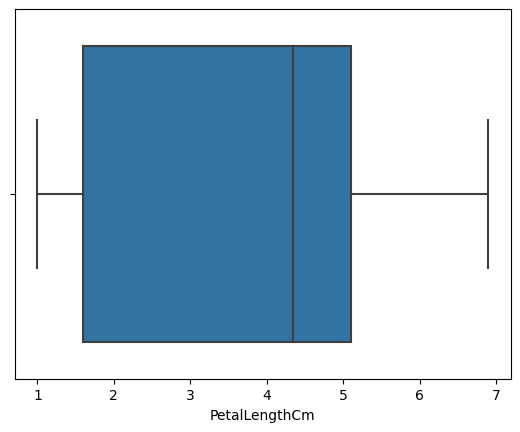

In [8]:
sns.boxplot(df["PetalLengthCm"])

<AxesSubplot:xlabel='PetalWidthCm'>

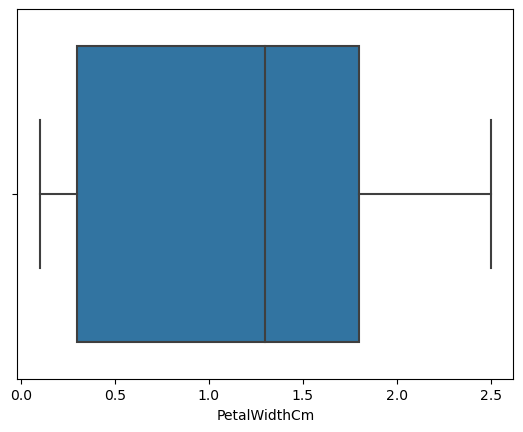

In [9]:
sns.boxplot(df["PetalWidthCm"])

## 4. Feature Engineering

### Outlier Imputation

### 1. SepalLengthCm

In [10]:
q1 = df['SepalLengthCm'].quantile(0.25)
q2 = df['SepalLengthCm'].quantile(0.50)
q3 = df['SepalLengthCm'].quantile(0.75)
median = df['SepalLengthCm'].median()

iqr = q3 - q1

upper_tail = q3 + 1.5 * iqr
lower_tail = q1 - 1.5 * iqr

print("Q1 :", q1)
print("Q2 :", q2)
print("Q3 :", q3)
print("Median :", median)

print("upper_tail :", upper_tail)
print("lower_tail :", lower_tail)

Q1 : 5.1
Q2 : 5.8
Q3 : 6.4
Median : 5.8
upper_tail : 8.350000000000001
lower_tail : 3.1499999999999986


In [11]:
df["SepalLengthCm"].loc[(df["SepalLengthCm"] > upper_tail) | (df["SepalLengthCm"] < lower_tail)]

Series([], Name: SepalLengthCm, dtype: float64)

### 2. SepalWidthCm

In [12]:
q1 = df['SepalWidthCm'].quantile(0.25)
q2 = df['SepalWidthCm'].quantile(0.50)
q3 = df['SepalWidthCm'].quantile(0.75)
median = df['SepalWidthCm'].median()

iqr = q3 - q1

upper_tail = q3 + 1.5 * iqr
lower_tail = q1 - 1.5 * iqr

print("Q1 :", q1)
print("Q2 :", q2)
print("Q3 :", q3)
print("Median :", median)

print("upper_tail", upper_tail)
print("lower_tail", lower_tail)

Q1 : 2.8
Q2 : 3.0
Q3 : 3.3
Median : 3.0
upper_tail 4.05
lower_tail 2.05


In [13]:
# To check for outliers in column & | means pipe. It is a bitwise OR of integers.
# df.loc is used for indexing & slicing.
# here we collect all outlier.
df["SepalWidthCm"].loc[(df["SepalWidthCm"] > upper_tail) | (df["SepalWidthCm"] < lower_tail)]

15    4.4
32    4.1
33    4.2
60    2.0
Name: SepalWidthCm, dtype: float64

<AxesSubplot:xlabel='SepalWidthCm', ylabel='Density'>

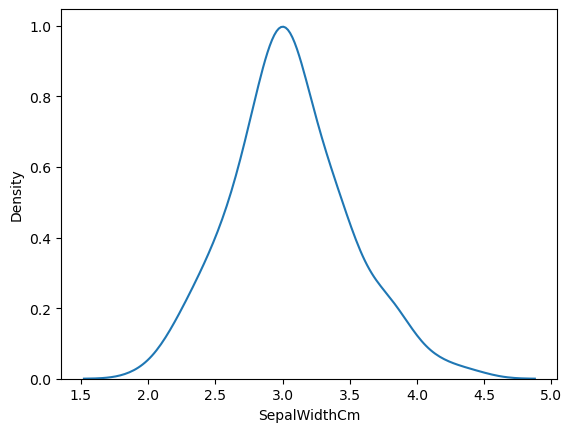

In [14]:
sns.kdeplot(df["SepalWidthCm"])

In [15]:
# To calculate median value of ouliers

Sepal_Width_median = df["SepalWidthCm"].loc[(df["SepalWidthCm"] <= upper_tail)
                                          & (df["SepalWidthCm"] >= lower_tail)].median()
Sepal_Width_median

3.0

In [16]:
# Outliers replaced by median value of ouliers
df.loc[(df["SepalWidthCm"] > upper_tail)
     | (df["SepalWidthCm"] < lower_tail), "SepalWidthCm"]  = Sepal_Width_median

In [17]:
# Again checking outliers for outliers
df["SepalWidthCm"].loc[(df["SepalWidthCm"] > upper_tail) | (df["SepalWidthCm"] < lower_tail)]

Series([], Name: SepalWidthCm, dtype: float64)

### 3. PetalLengthCm

In [18]:
q1 = df['PetalLengthCm'].quantile(0.25)
q2 = df['PetalLengthCm'].quantile(0.50)
q3 = df['PetalLengthCm'].quantile(0.75)
median = df['PetalLengthCm'].median()

iqr = q3 - q1

upper_tail = q3 + 1.5 * iqr
lower_tail = q1 - 1.5 * iqr

print("Q1 :", q1)
print("Q2 :", q2)
print("Q3 :", q3)
print("Median :", median)

print("upper_tail", upper_tail)
print("lower_tail", lower_tail)

Q1 : 1.6
Q2 : 4.35
Q3 : 5.1
Median : 4.35
upper_tail 10.349999999999998
lower_tail -3.649999999999999


In [19]:
# To check for outliers in column & | means pipe. It is a bitwise OR of integers
df["PetalLengthCm"].loc[(df["PetalLengthCm"] > upper_tail) | (df["PetalLengthCm"] < lower_tail)]

Series([], Name: PetalLengthCm, dtype: float64)

### 4. PetalWidthCm

In [20]:
q1 = df['PetalWidthCm'].quantile(0.25)
q2 = df['PetalWidthCm'].quantile(0.50)
q3 = df['PetalWidthCm'].quantile(0.75)
median = df['PetalWidthCm'].median()

iqr = q3 - q1

upper_tail = q3 + 1.5 * iqr
lower_tail = q1 - 1.5 * iqr

print("Q1 :", q1)
print("Q2 :", q2)
print("Q3 :", q3)
print("Median :", median)

print("upper_tail", upper_tail)
print("lower_tail", lower_tail)

Q1 : 0.3
Q2 : 1.3
Q3 : 1.8
Median : 1.3
upper_tail 4.05
lower_tail -1.95


In [21]:
# To check for outliers in column & | means pipe. It is a bitwise OR of integers
df["PetalWidthCm"].loc[(df["PetalWidthCm"] > upper_tail) | (df["PetalWidthCm"] < lower_tail)]

Series([], Name: PetalWidthCm, dtype: float64)

### Encoding

In [22]:
# ML model only process numerical data, so we need to convert categorical data to numerical data
df['Species'].replace({'Iris-setosa':0, 'Iris-versicolor': 1, 'Iris-virginica':2}, inplace = True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 7.2 KB


In [24]:
df['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

<AxesSubplot:xlabel='Species', ylabel='count'>

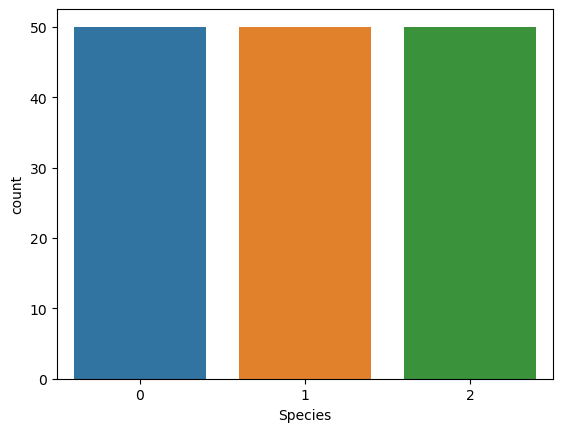

In [25]:
sns.countplot(x = df['Species'])

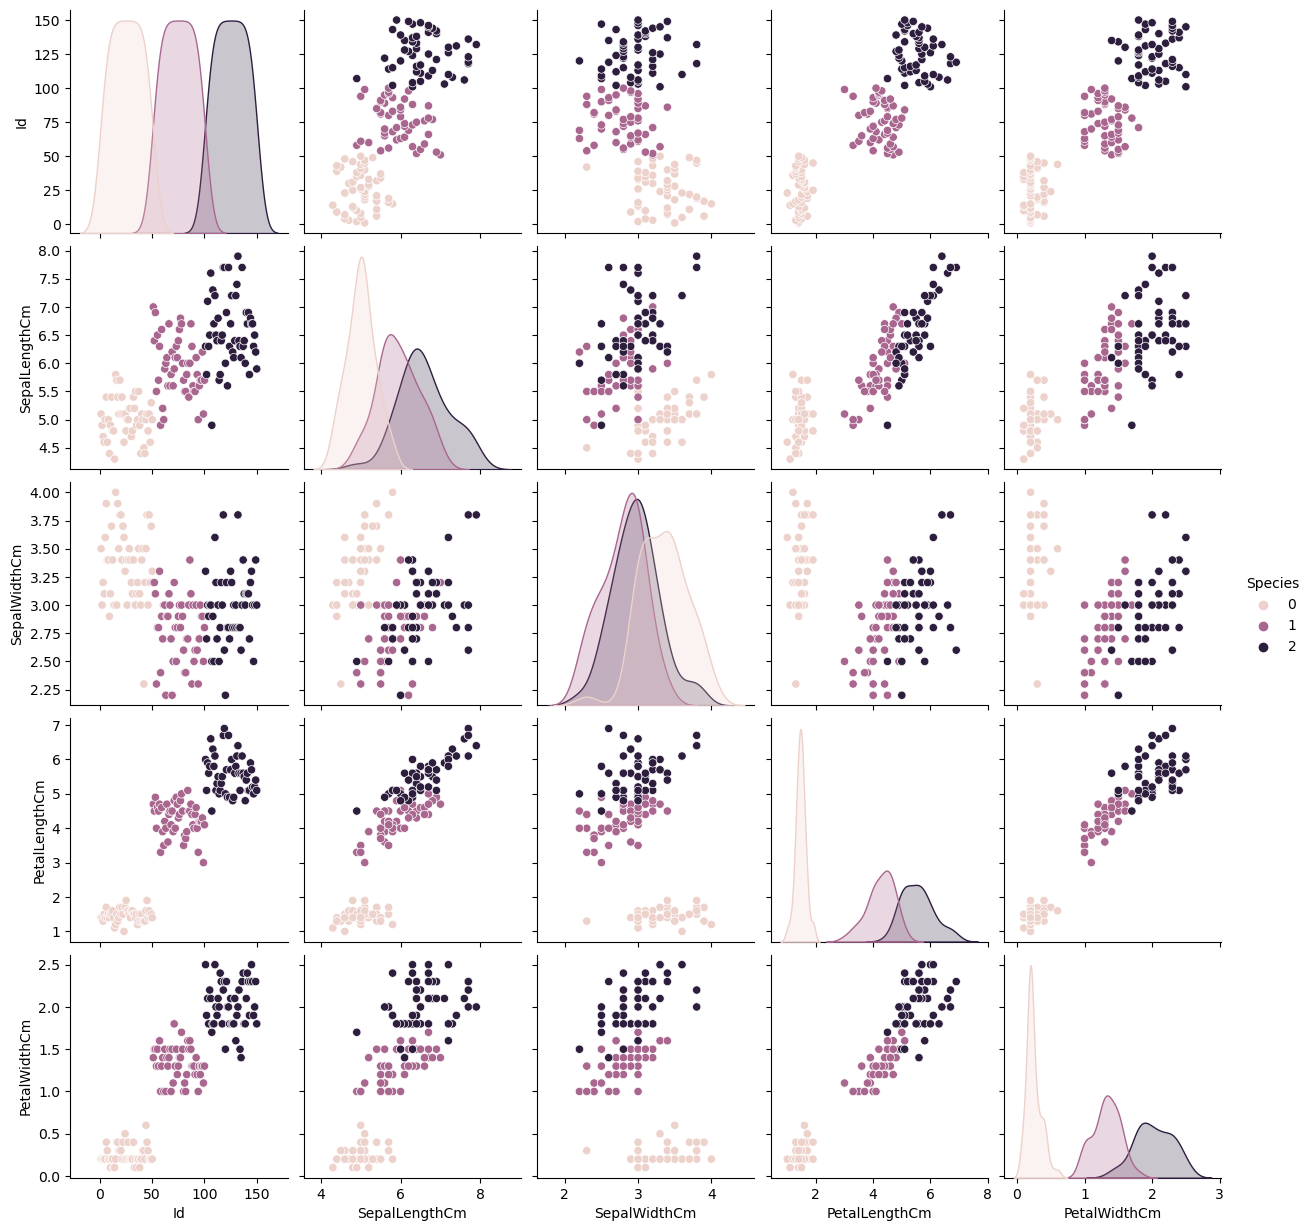

In [26]:
sns.pairplot(df, hue = 'Species')

In [27]:
px.scatter_3d(df, x = df['SepalLengthCm'], y = df['SepalWidthCm'], z = df['PetalLengthCm'], color = df['Species'])

## 5. Feature Engineering

### Train-Test Split

In [28]:
x = df.drop(["Species", "Id"], axis = 1)
y = df["Species"]
x_train, x_test, y_train, y_test = train_test_split(x,y, 
                                                    test_size = 0.3,   # means 0.7 is train_size
                                                    random_state = 15, # To freez dataframe 
                                                    stratify = y)      # To insure both train & test have
                                                                       # same proportion of example in each class. 

In [29]:
y.value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

## 6. Model Building

In [30]:
logistic_model = LogisticRegression(multi_class = 'ovr') # For multiclass Classification
logistic_model.fit(x_train, y_train)                     # problem we use ovr = One Vs All 

LogisticRegression(multi_class='ovr')

## 7. Model Evaluation

In [31]:
# Training Accuracy

y_pred_train = logistic_model.predict(x_train) # To get prediction

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusin Matrix:\n", cnf_matrix)
print()

# visualization also
multi_cnf_matrix = multilabel_confusion_matrix(y_train, y_pred_train)
print("Multilabel COnfusion Matrix\n",multi_cnf_matrix)
print()
print(":"*50)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy: ", accuracy)
print(":"*50)
print()

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report:\n", clf_report)

Confusin Matrix:
 [[35  0  0]
 [ 0 32  3]
 [ 0  1 34]]

Multilabel COnfusion Matrix
 [[[70  0]
  [ 0 35]]

 [[69  1]
  [ 3 32]]

 [[67  3]
  [ 1 34]]]

::::::::::::::::::::::::::::::::::::::::::::::::::
Accuracy:  0.9619047619047619
::::::::::::::::::::::::::::::::::::::::::::::::::

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.97      0.91      0.94        35
           2       0.92      0.97      0.94        35

    accuracy                           0.96       105
   macro avg       0.96      0.96      0.96       105
weighted avg       0.96      0.96      0.96       105



In [32]:
logistic_model.score(x_train, y_train)

0.9619047619047619

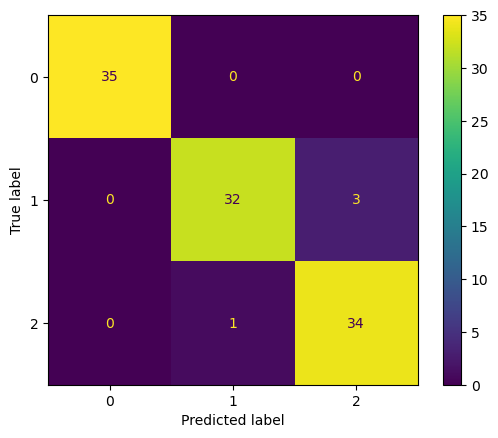

In [33]:
# Visual representation of confusion matrix.
plot_confusion_matrix(logistic_model, x_train, y_train)

In [34]:
# Testing Accuracy

y_pred = logistic_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cnf_matrix)
print()

# visualization also
multi_cnf_matrix = multilabel_confusion_matrix(y_train, y_pred_train)
print("Multilabel COnfusion Matrix\n",multi_cnf_matrix)
print()
print(":"*50)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(":"*50)
print()

clf_report = classification_report(y_test, y_pred)
print("Classification Report:\n",clf_report)

Confusion Matrix:
 [[15  0  0]
 [ 0 13  2]
 [ 0  2 13]]

Multilabel COnfusion Matrix
 [[[70  0]
  [ 0 35]]

 [[69  1]
  [ 3 32]]

 [[67  3]
  [ 1 34]]]

::::::::::::::::::::::::::::::::::::::::::::::::::
Accuracy: 0.9111111111111111
::::::::::::::::::::::::::::::::::::::::::::::::::

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.87      0.87      0.87        15
           2       0.87      0.87      0.87        15

    accuracy                           0.91        45
   macro avg       0.91      0.91      0.91        45
weighted avg       0.91      0.91      0.91        45



In [35]:
logistic_model.score(x_test, y_test)

0.9111111111111111

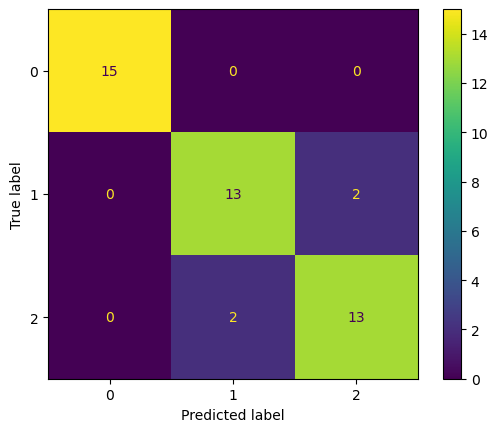

In [36]:
plot_confusion_matrix(logistic_model, x_test, y_test)

In [37]:
y_pred_prob = logistic_model.predict_proba(x_test)
y_pred_prob

array([[9.46057011e-01, 5.39284562e-02, 1.45327385e-05],
       [3.45532089e-01, 6.50305179e-01, 4.16273170e-03],
       [9.26447923e-01, 7.35463502e-02, 5.72648315e-06],
       [1.13720541e-03, 4.39863530e-01, 5.58999265e-01],
       [5.58006544e-04, 3.89001164e-01, 6.10440829e-01],
       [8.70235402e-01, 1.29757858e-01, 6.73974177e-06],
       [1.23679094e-04, 2.30233213e-01, 7.69643108e-01],
       [8.87274597e-01, 1.12720480e-01, 4.92243943e-06],
       [1.39200531e-03, 5.97535916e-01, 4.01072079e-01],
       [3.25760924e-04, 1.81399557e-01, 8.18274682e-01],
       [4.56590669e-02, 9.03169662e-01, 5.11712709e-02],
       [9.03978671e-01, 9.60118777e-02, 9.45172864e-06],
       [7.95428397e-01, 2.04566386e-01, 5.21646365e-06],
       [7.81969975e-01, 2.18025520e-01, 4.50542260e-06],
       [8.30277399e-03, 7.54930568e-01, 2.36766658e-01],
       [4.65535346e-04, 3.45572177e-01, 6.53962287e-01],
       [3.22712084e-02, 9.32816504e-01, 3.49122875e-02],
       [8.07618954e-01, 1.92371

In [38]:
# Creating a Pickle File. It is used to save model.
with open("Iris_clf_LogR.pkl", "wb") as f:
    pickle.dump(logistic_model, f)

In [39]:
# Creating a Json file.
Species_Values =  {"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2}
column_names = x.columns
json_data = {"Species" : Species_Values, "Columns" : list(column_names)}
json_data

{'Species': {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2},
 'Columns': ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']}

In [40]:
with open("Iris_clf_LogR_Json_data.json", "w") as f:
    json.dump(json_data, f)

## Single User Input Testing 

In [41]:
x.head(1)

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2

In [42]:
# Creating variable of features to store user input
SepalLengthCm = 5.7
SepalWidthCm  = 3.8
PetalLengthCm = 1.7
PetalWidthCm  = 0.5

In [43]:
# Creating zeros array  
test_array = np.zeros(len(column_names))
test_array

array([0., 0., 0., 0.])

In [44]:
# Linking zeros array to variable of features to maintain proper order of dataset 
test_array[0] = SepalLengthCm
test_array[1] = SepalWidthCm
test_array[2] = PetalLengthCm
test_array[3] = PetalWidthCm

In [45]:
# Checking workability of zeros array 
test_array

array([5.7, 3.8, 1.7, 0.5])

In [46]:
# Applying condition to print predict of user input
flower_species = logistic_model.predict([test_array])[0]

if flower_species == 0:
    print("Iris-Setosa")
elif flower_species == 1:
    print("Iris-versicolor")
else:
    print("Iris-virginica")

Iris-Setosa
